In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("results.csv", sep=';')
df2 = pd.read_csv("training_results.csv", sep=';')

df = df.astype( { "accuracy":float } )
df2 = df2.astype( { "val_accuracy":float } )

In [5]:
cnn = df[ df['model'] == 'CNN' ]
res = df[ df['model'] == 'RESNET' ]
inc = df[ df['model'] == 'INCEPTION' ]
enc = df[ df['model'] == 'ENCODER' ]

In [6]:
training_sets = df[ 'training_set' ].unique()
print(len(training_sets))

85


In [7]:
pre_trained_sets = df[ 'pre_trained_set' ].unique()

In [8]:
df2 = df2[ df2[ 'set' ].isin( training_sets ) ]

In [9]:
normal_training_100 = df2[ df2[ 'epochs' ] == 100 ]
normal_training_1000 = df2[ df2[ 'epochs' ] == 1000 ]

nt_cnn_100 = normal_training_100[ normal_training_100[ 'model' ] == 'cnn' ].reset_index()
nt_cnn_1000 = normal_training_1000[ normal_training_1000[ 'model' ] == 'cnn' ].reset_index()
nt_res_100 = normal_training_100[ normal_training_100[ 'model' ] == 'resnet' ].reset_index()
nt_res_1000 = normal_training_1000[ normal_training_1000[ 'model' ] == 'resnet' ].reset_index()
nt_inc_100 = normal_training_100[ normal_training_100[ 'model' ] == 'inception' ].reset_index()
nt_inc_1000 = normal_training_1000[ normal_training_1000[ 'model' ] == 'inception' ].reset_index()
nt_enc_100 = normal_training_100[ normal_training_100[ 'model' ] == 'encoder' ].reset_index()
nt_enc_1000 = normal_training_1000[ normal_training_1000[ 'model' ] == 'encoder' ].reset_index()


In [10]:
df_100 = df[ df[ 'epochs' ] == 100 ]
df_1000 = df[ df[ 'epochs' ] == 1000 ]

df_100_none = df_100[ df_100[ 'num_frozen_layers' ] == 0 ]
df_1000_none = df_1000[ df_1000[ 'num_frozen_layers' ] == 0 ]
df_100_all = df_100[ df_100[ 'num_frozen_layers' ] != 0 ]
df_1000_all = df_1000[ df_1000[ 'num_frozen_layers' ] != 0 ]

In [11]:
def show_bar( set, name ):
    
    s = sns.barplot( x = 'accuracy', y = 'training_set', hue = 'model', data = set, ci=0.95 ) 
    leg = s.get_legend()
    leg.set_title( "model" )
    labs = leg.texts
    s.set_title( name )

    s.axes.xaxis.label.set_text( "training_set" )
    s.axes.yaxis.label.set_text( "accuracy" )

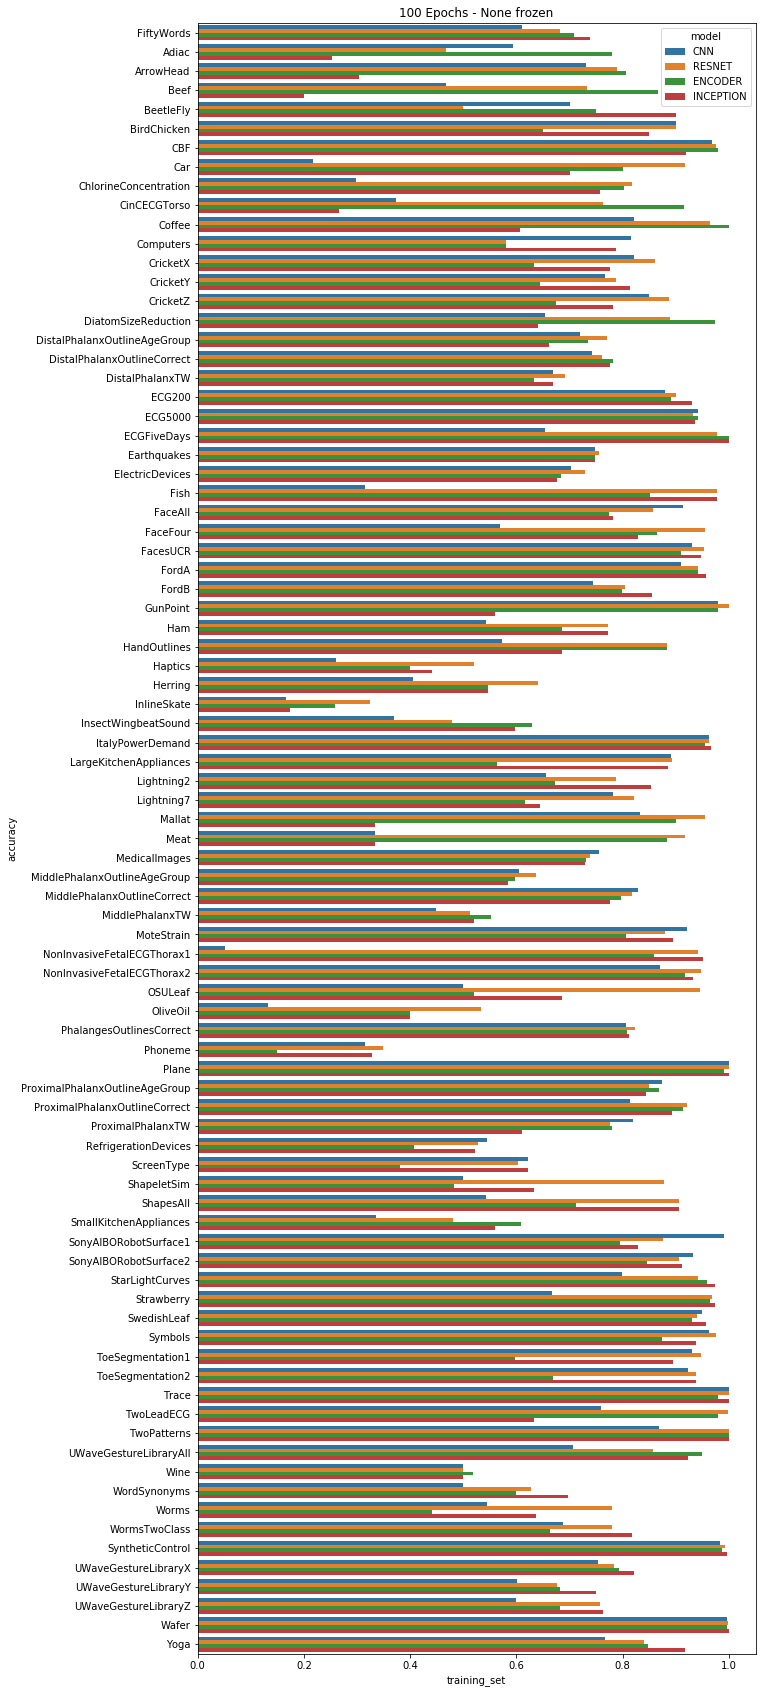

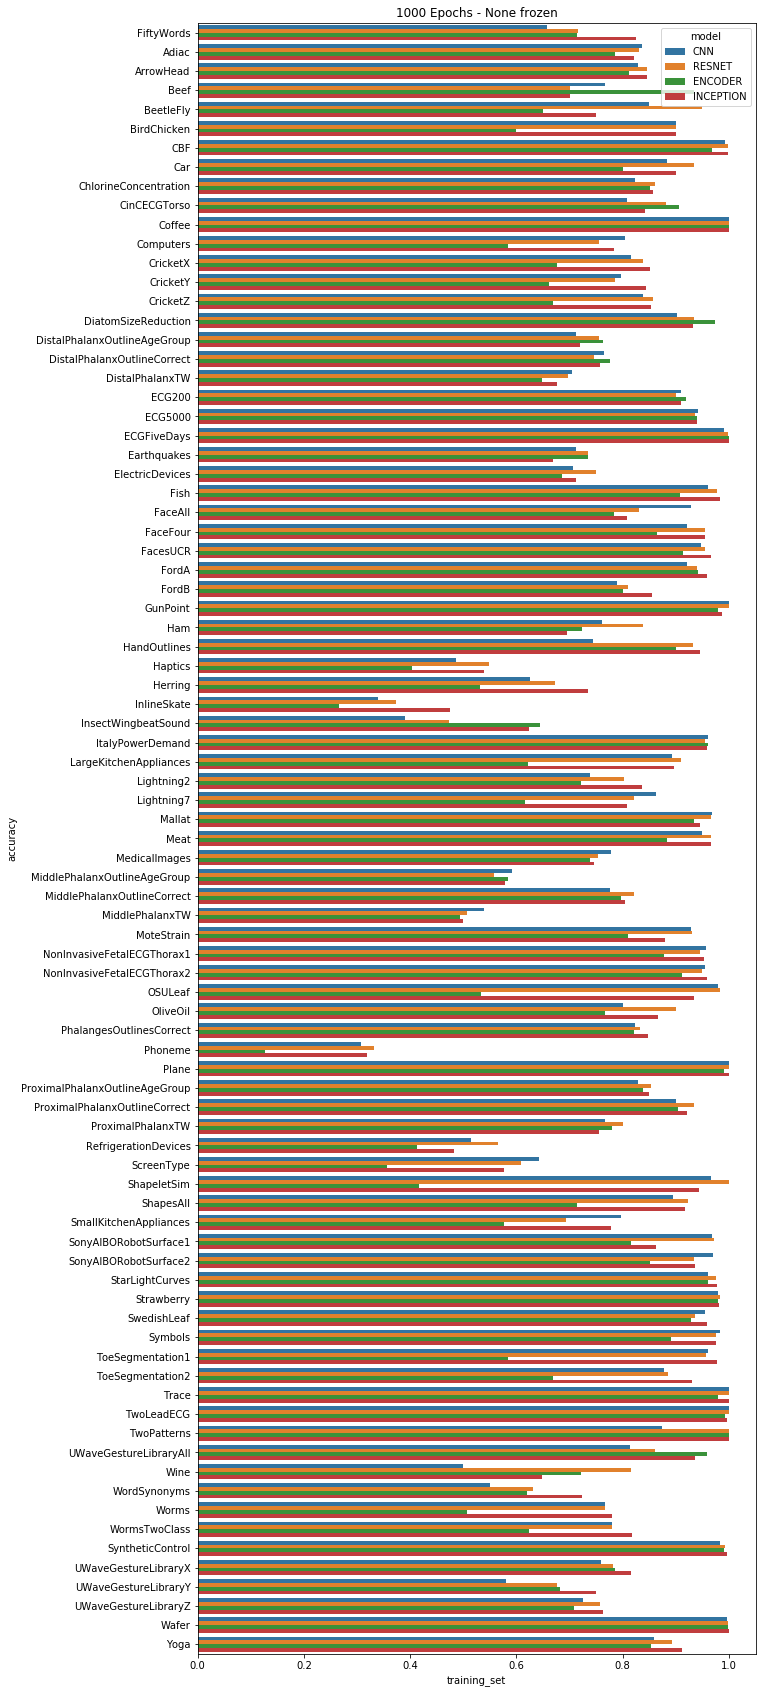

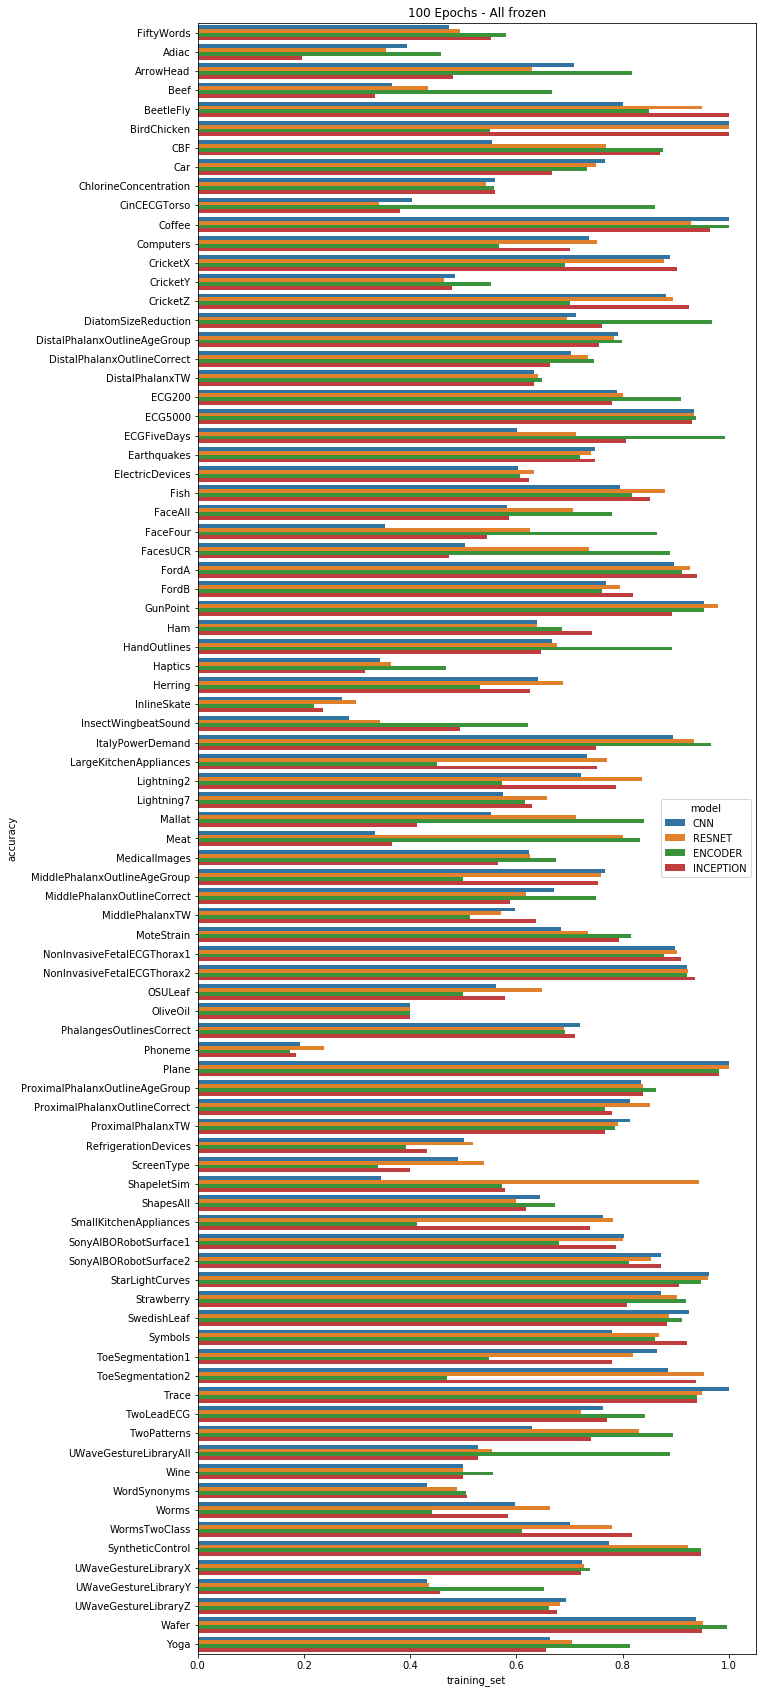

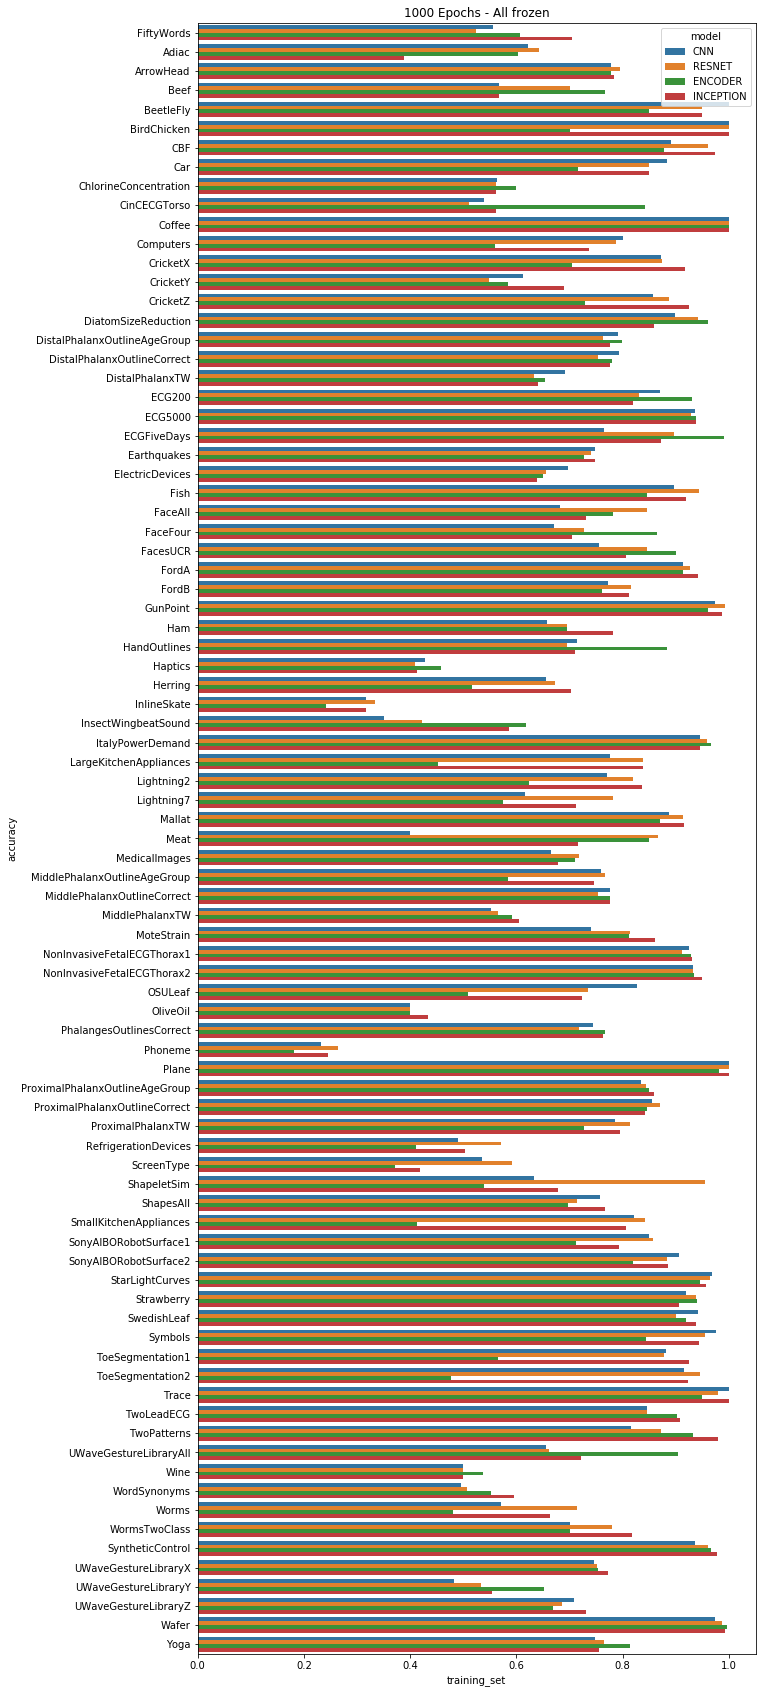

In [12]:
plt.rcParams[ "figure.figsize" ] = [ 10, 30 ]

show_bar( df_100_none, '100 Epochs - None frozen' )
plt.savefig( 'all_accuracy-100_none.png' )
plt.show()

show_bar( df_1000_none, '1000 Epochs - None frozen' )
plt.savefig( 'all_accuracy-1000_none.png' )
plt.show()

show_bar( df_100_all, '100 Epochs - All frozen' )
plt.savefig( 'all_accuracy-100_all.png' )
plt.show()

show_bar( df_1000_all, '1000 Epochs - All frozen' )
plt.savefig( 'all_accuracy-1000_all.png' )
plt.show()

In [13]:
def summary( set_name, name ):
    
    p = sns.barplot( x = 'model', y = 'accuracy', data = set_name, capsize = 0.05, errcolor = 'gray', errwidth = 2 ) 
    p.set_title( name )

    p.axes.yaxis.label.set_text( "accuracy" )

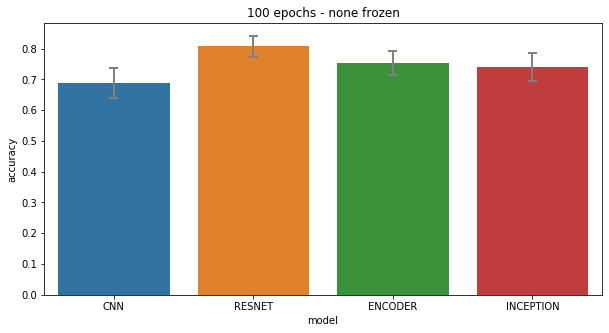

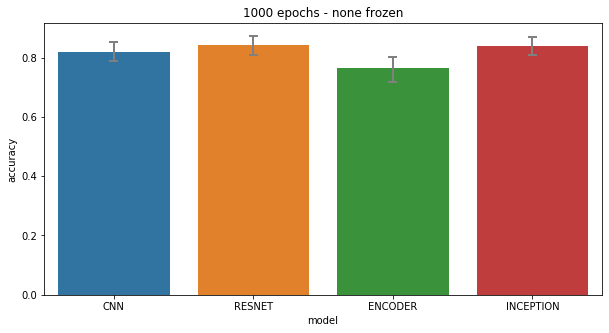

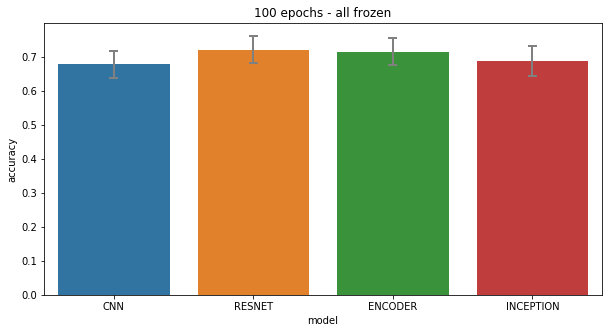

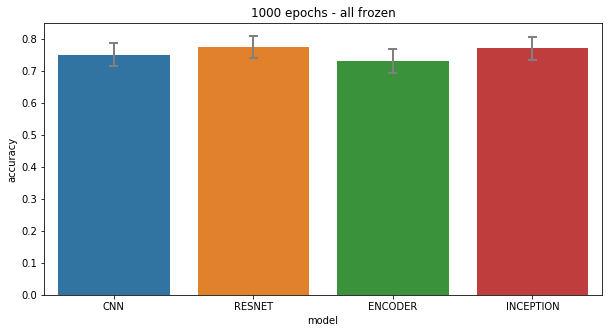

In [14]:
plt.rcParams[ "figure.figsize" ] = [ 10, 5 ]

summary( df_100_none, '100 epochs - none frozen' )
plt.show()

summary( df_1000_none, '1000 epochs - none frozen' )
plt.show()

summary( df_100_all, '100 epochs - all frozen' )
plt.show()

summary( df_1000_all, '1000 epochs - all frozen' )
plt.show()

In [15]:
avg_transfer_100_none_cnn = df_100_none[ df_100_none[ 'model' ] == 'CNN' ][ 'accuracy' ].mean()
avg_transfer_100_none_res = df_100_none[ df_100_none[ 'model' ] == 'RESNET' ][ 'accuracy' ].mean()
avg_transfer_100_none_inc = df_100_none[ df_100_none[ 'model' ] == 'INCEPTION' ][ 'accuracy' ].mean()
avg_transfer_100_none_enc = df_100_none[ df_100_none[ 'model' ] == 'ENCODER' ][ 'accuracy' ].mean()

avg_transfer_1000_none_cnn = df_1000_none[ df_1000_none[ 'model' ] == 'CNN' ][ 'accuracy' ].mean()
avg_transfer_1000_none_res = df_1000_none[ df_1000_none[ 'model' ] == 'RESNET' ][ 'accuracy' ].mean()
avg_transfer_1000_none_inc = df_1000_none[ df_1000_none[ 'model' ] == 'INCEPTION' ][ 'accuracy' ].mean()
avg_transfer_1000_none_enc = df_1000_none[ df_1000_none[ 'model' ] == 'ENCODER' ][ 'accuracy' ].mean()

avg_transfer_100_all_cnn = df_100_all[ df_100_all[ 'model' ] == 'CNN' ][ 'accuracy' ].mean()
avg_transfer_100_all_res = df_100_all[ df_100_all[ 'model' ] == 'RESNET' ][ 'accuracy' ].mean()
avg_transfer_100_all_inc = df_100_all[ df_100_all[ 'model' ] == 'INCEPTION' ][ 'accuracy' ].mean()
avg_transfer_100_all_enc = df_100_all[ df_100_all[ 'model' ] == 'ENCODER' ][ 'accuracy' ].mean()

avg_transfer_1000_all_cnn = df_1000_all[ df_1000_all[ 'model' ] == 'CNN' ][ 'accuracy' ].mean()
avg_transfer_1000_all_res = df_1000_all[ df_1000_all[ 'model' ] == 'RESNET' ][ 'accuracy' ].mean()
avg_transfer_1000_all_inc = df_1000_all[ df_1000_all[ 'model' ] == 'INCEPTION' ][ 'accuracy' ].mean()
avg_transfer_1000_all_enc = df_1000_all[ df_1000_all[ 'model' ] == 'ENCODER' ][ 'accuracy' ].mean()

avg_100_training_cnn = normal_training_100[ normal_training_100[ 'model' ] == 'cnn' ][ 'val_accuracy' ].mean()
avg_100_training_res = normal_training_100[ normal_training_100[ 'model' ] == 'resnet' ][ 'val_accuracy' ].mean()
avg_100_training_inc = normal_training_100[ normal_training_100[ 'model' ] == 'inception' ][ 'val_accuracy' ].mean()
avg_100_training_enc = normal_training_100[ normal_training_100[ 'model' ] == 'encoder' ][ 'val_accuracy' ].mean()

avg_1000_training_cnn = normal_training_1000[ normal_training_1000[ 'model' ] == 'cnn' ][ 'val_accuracy' ].mean()
avg_1000_training_res = normal_training_1000[ normal_training_1000[ 'model' ] == 'resnet' ][ 'val_accuracy' ].mean()
avg_1000_training_inc = normal_training_1000[ normal_training_1000[ 'model' ] == 'inception' ][ 'val_accuracy' ].mean()
avg_1000_training_enc = normal_training_1000[ normal_training_1000[ 'model' ] == 'encoder' ][ 'val_accuracy' ].mean()

In [16]:
avg = pd.DataFrame( { 'model': [ 'CNN', 'CNN', 'CNN', 'CNN', 'RESNET', 'RESNET', 'RESNET', 'RESNET', 'INCEPTION', 'INCEPTION', 'INCEPTION', 'INCEPTION', 'ENCODER', 'ENCODER', 'ENCODER', 'ENCODER', 'CNN', 'CNN', 'RESNET', 'RESNET', 'INCEPTION', 'INCEPTION', 'ENCODER', 'ENCODER' ],
                    'epochs': [ '100', '100', '1000', '1000', '100', '100', '1000', '1000', '100', '100', '1000', '1000', '100', '100', '1000', '1000', '100', '1000', '100', '1000', '100', '1000', '100', '1000' ],
                    'num_frozen_layers': [ 'None', 'All', 'None', 'All', 'None', 'All', 'None', 'All', 'None', 'All', 'None', 'All', 'None', 'All', 'None', 'All', 'Training', 'Training', 'Training', 'Training', 'Training', 'Training', 'Training', 'Training' ],
                    'mean_accuracy' : [ avg_transfer_100_none_cnn, avg_transfer_100_all_cnn, avg_transfer_1000_none_cnn , avg_transfer_1000_all_cnn, avg_transfer_100_none_res, avg_transfer_100_all_res, avg_transfer_1000_none_res , avg_transfer_1000_all_res,
                                      avg_transfer_100_none_inc, avg_transfer_100_all_inc, avg_transfer_1000_none_inc , avg_transfer_1000_all_inc, avg_transfer_100_none_enc, avg_transfer_100_all_enc, avg_transfer_1000_none_enc , avg_transfer_1000_all_enc,
                                      avg_100_training_cnn, avg_1000_training_cnn, avg_100_training_res, avg_1000_training_res, avg_100_training_inc, avg_1000_training_inc, avg_100_training_enc, avg_1000_training_enc ] } )
print( avg )

        model epochs num_frozen_layers  mean_accuracy
0         CNN    100              None       0.687992
1         CNN    100               All       0.677861
2         CNN   1000              None       0.820170
3         CNN   1000               All       0.749601
4      RESNET    100              None       0.807243
5      RESNET    100               All       0.719418
6      RESNET   1000              None       0.841056
7      RESNET   1000               All       0.774999
8   INCEPTION    100              None       0.740110
9   INCEPTION    100               All       0.687681
10  INCEPTION   1000              None       0.839675
11  INCEPTION   1000               All       0.772561
12    ENCODER    100              None       0.754343
13    ENCODER    100               All       0.714115
14    ENCODER   1000              None       0.764622
15    ENCODER   1000               All       0.731537
16        CNN    100          Training       0.479678
17        CNN   1000        

In [17]:
avg[ 'Hue' ] = avg[ 'epochs' ] + ' - ' + avg[ 'num_frozen_layers' ]
avg = avg.sort_values( by = 'Hue' )
print( avg )

        model epochs num_frozen_layers  mean_accuracy              Hue
1         CNN    100               All       0.677861        100 - All
5      RESNET    100               All       0.719418        100 - All
9   INCEPTION    100               All       0.687681        100 - All
13    ENCODER    100               All       0.714115        100 - All
0         CNN    100              None       0.687992       100 - None
4      RESNET    100              None       0.807243       100 - None
8   INCEPTION    100              None       0.740110       100 - None
12    ENCODER    100              None       0.754343       100 - None
20  INCEPTION    100          Training       0.491675   100 - Training
18     RESNET    100          Training       0.562018   100 - Training
16        CNN    100          Training       0.479678   100 - Training
22    ENCODER    100          Training       0.714615   100 - Training
15    ENCODER   1000               All       0.731537       1000 - All
11  IN

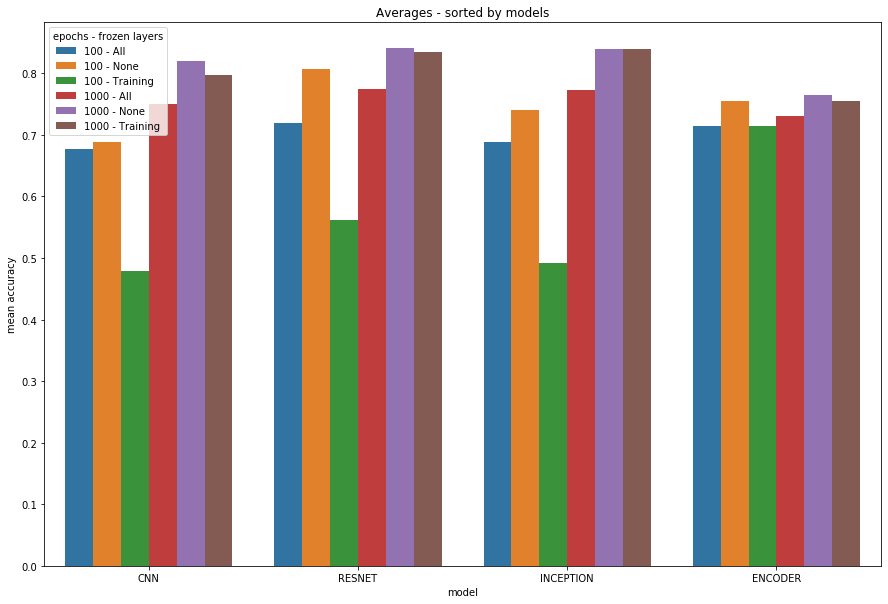

In [18]:
plt.rcParams[ "figure.figsize" ] = [ 15, 10 ]

s = sns.barplot( x = 'model', y = 'mean_accuracy', hue = 'Hue', data = avg, ci=0.95 )
s.get_legend().set_title( "epochs - frozen layers" )
s.set_title( 'Averages - sorted by models' )

s.axes.xaxis.label.set_text( "model" )
s.axes.yaxis.label.set_text( "mean accuracy" )


plt.savefig( 'average_models.png' )

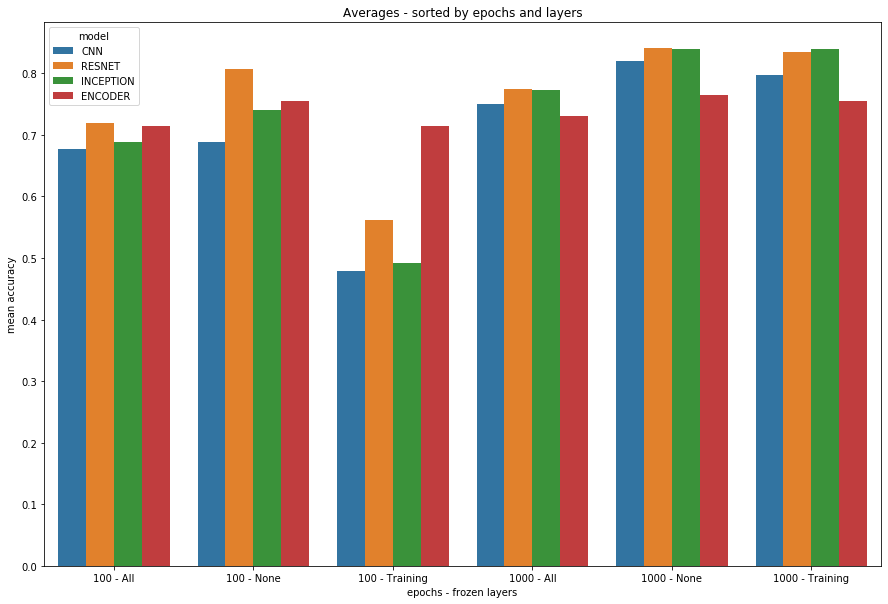

In [19]:
s = sns.barplot( x = 'Hue', y = 'mean_accuracy', hue = 'model', data = avg, ci=0.95 )
s.get_legend().set_title( "model" )
s.set_title( 'Averages - sorted by epochs and layers' )

s.axes.xaxis.label.set_text( "epochs - frozen layers" )
s.axes.yaxis.label.set_text( "mean accuracy" )

plt.savefig( 'average_setup.png' )

In [20]:
heat = pd.DataFrame()
#heat.columns = [ 'Adiac' ]
#heat.rename( index = { 0:'CNN' }, inplace = True )

In [21]:
cnn_100_none = df_100_none[ df_100_none[ 'model' ] == 'CNN' ].reset_index()
cnn_1000_none = df_1000_none[ df_1000_none[ 'model' ] == 'CNN' ].reset_index()
cnn_1000_all = df_1000_all[ df_1000_all[ 'model' ] == 'CNN' ].reset_index()
cnn_100_all = df_100_all[ df_100_all[ 'model' ] == 'CNN' ].reset_index()

res_100_none = df_100_none[ df_100_none[ 'model' ] == 'RESNET' ].reset_index()
res_100_all = df_100_all[ df_100_all[ 'model' ] == 'RESNET' ].reset_index()
res_1000_none = df_1000_none[ df_1000_none[ 'model' ] == 'RESNET' ].reset_index()
res_1000_all = df_1000_all[ df_1000_all[ 'model' ] == 'RESNET' ].reset_index()

inc_100_none = df_100_none[ df_100_none[ 'model' ] == 'INCEPTION' ].reset_index()
inc_100_all = df_100_all[ df_100_all[ 'model' ] == 'INCEPTION' ].reset_index()
inc_1000_none = df_1000_none[ df_1000_none[ 'model' ] == 'INCEPTION' ].reset_index()
inc_1000_all = df_1000_all[ df_1000_all[ 'model' ] == 'INCEPTION' ].reset_index()

enc_100_none = df_100_none[ df_100_none[ 'model' ] == 'ENCODER' ].reset_index()
enc_100_all = df_100_all[ df_100_all[ 'model' ] == 'ENCODER' ].reset_index()
enc_1000_none = df_1000_none[ df_1000_none[ 'model' ] == 'ENCODER' ].reset_index()
enc_1000_all = df_1000_all[ df_1000_all[ 'model' ] == 'ENCODER' ].reset_index()

In [22]:
heat[ 'cnn_100_none' ] = cnn_100_none[ 'accuracy' ] - nt_cnn_100[ 'val_accuracy' ]
heat[ 'cnn_100_all' ] = cnn_100_all[ 'accuracy' ] - nt_cnn_100[ 'val_accuracy' ]
heat[ 'cnn_1000_none' ] = cnn_1000_none[ 'accuracy' ] - nt_cnn_1000[ 'val_accuracy' ]
heat[ 'cnn_1000_all' ] = cnn_1000_all[ 'accuracy' ] - nt_cnn_1000[ 'val_accuracy' ]

heat[ 'res_100_none' ] = res_100_none[ 'accuracy' ] - nt_cnn_100[ 'val_accuracy' ]
heat[ 'res_100_all' ] = res_100_all[ 'accuracy' ] - nt_cnn_100[ 'val_accuracy' ]
heat[ 'res_1000_none' ] = res_1000_none[ 'accuracy' ] - nt_res_1000[ 'val_accuracy' ]
heat[ 'res_1000_all' ] = res_1000_all[ 'accuracy' ] - nt_res_1000[ 'val_accuracy' ]

heat[ 'inc_100_none' ] = inc_100_none[ 'accuracy' ] - nt_inc_100[ 'val_accuracy' ]
heat[ 'inc_100_all' ] = inc_100_all[ 'accuracy' ] - nt_inc_100[ 'val_accuracy' ]
heat[ 'inc_1000_none' ] = inc_1000_none[ 'accuracy' ] - nt_inc_1000[ 'val_accuracy' ]
heat[ 'inc_1000_all' ] = inc_1000_all[ 'accuracy' ] - nt_inc_1000[ 'val_accuracy' ]

heat[ 'enc_100_none' ] = enc_100_none[ 'accuracy' ] - nt_enc_1000[ 'val_accuracy' ]
heat[ 'enc_100_all' ] = enc_100_all[ 'accuracy' ] - nt_enc_1000[ 'val_accuracy' ]
heat[ 'enc_1000_none' ] = enc_1000_none[ 'accuracy' ] - nt_enc_1000[ 'val_accuracy' ]
heat[ 'enc_1000_all' ] = enc_1000_all[ 'accuracy' ] - nt_enc_1000[ 'val_accuracy' ]

heat = heat.T
heat.columns = training_sets

heat = heat.T
print( heat )

                      cnn_100_none  cnn_100_all  cnn_1000_none  cnn_1000_all  \
FiftyWords                0.288689     0.150227      -0.130557     -0.231656   
Adiac                     0.290450     0.090962       0.019217     -0.195617   
ArrowHead                 0.531429     0.508571       0.195271      0.143843   
Beef                     -0.033333    -0.133333      -0.083333     -0.283333   
BeetleFly                 0.200000     0.300000      -0.050000      0.100000   
...                            ...          ...            ...           ...   
UWaveGestureLibraryX      0.252931     0.222501       0.258515      0.245394   
UWaveGestureLibraryY      0.415119     0.244544       0.081444     -0.015150   
UWaveGestureLibraryZ      0.496044     0.589847      -0.041744     -0.057099   
Wafer                     0.424382     0.366465       0.268969      0.246905   
Yoga                      0.230633     0.126633       0.107967     -0.002033   

                      res_100_none  res

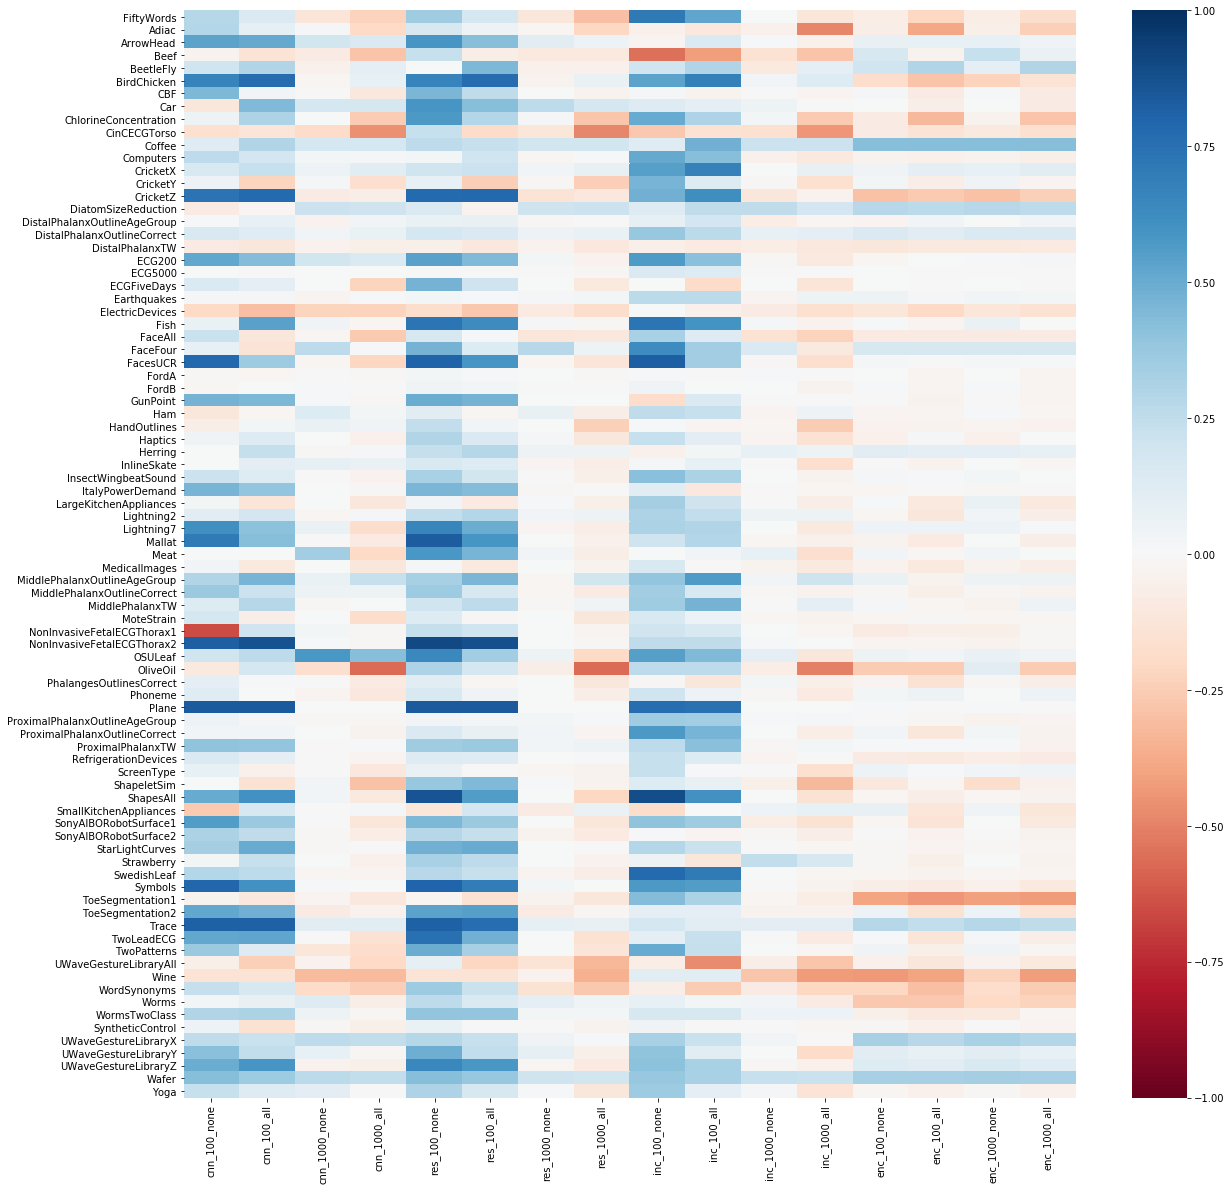

In [23]:
plt.rcParams[ "figure.figsize" ] = [ 20, 20 ]

p = sns.heatmap( heat, annot = False, cmap = "RdBu", vmin=-1, vmax=1 )

# + -> Transfer better
# - -> normal better

plt.savefig( 'heatmap.png' )
plt.show()